#### This is EDA and Experimental Analysis for IT20 dataset. The same operations can be applied to the IPL dataset with ease.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

t20_data = pd.read_csv('it20.csv')

**Methods of Dismissal**

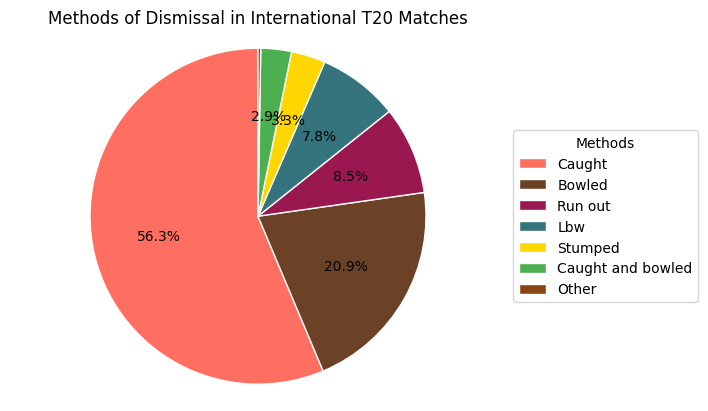

In [17]:
filtered_df = t20_data[t20_data['Method'] != 'N/A']
value_counts = filtered_df['Method'].value_counts()
threshold = 50  
filtered_value_counts = value_counts[value_counts >= threshold]
other_count = value_counts[value_counts < threshold].sum()
filtered_value_counts['Other'] = other_count

labels = filtered_value_counts.index.str.capitalize()
colors =['#FF6F61', '#6B4226', '#9A1750', '#36747D', '#FFD700', '#4CAF50', '#8B4513']
fig, ax = plt.subplots()
def autopct_filter(pct):
    return f'{pct:.1f}%' if pct >= 1 else ''

wedges, texts, _ = ax.pie(
    filtered_value_counts,
    labels=None, 
    autopct=autopct_filter, 
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}, 
)
ax.legend(labels, title="Methods", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.axis('equal')
plt.title('Methods of Dismissal in International T20 Matches')
plt.show()

**Runs/Over and Wickets/Over**

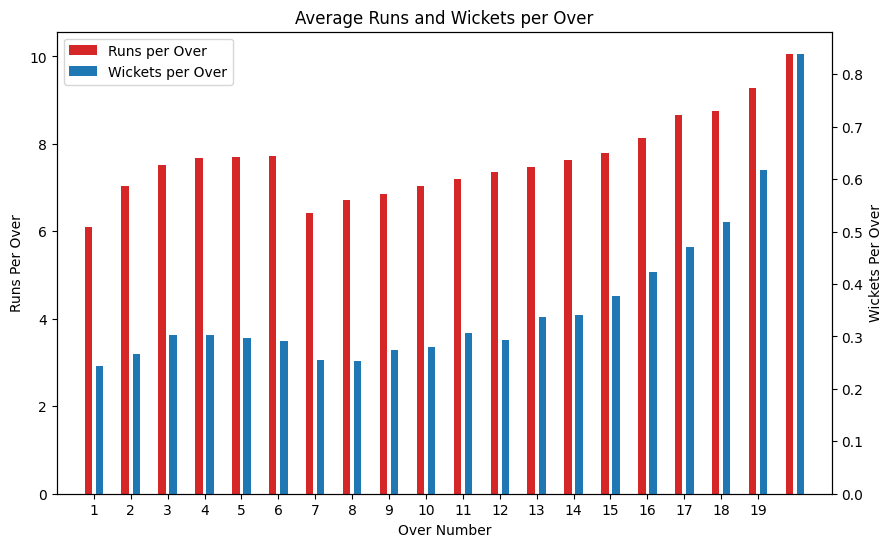

In [15]:
overs = list(np.arange(1,21))
Rpo = []
Wpo = []
for over in overs:
    over_df = t20_data.loc[t20_data['Over'] == over]   
    total_balls = len(over_df[over_df['Ball Rebowled'] == 0].index)
    avg_wick_pb = over_df['Wicket'].sum()/(total_balls)
    avg_pb = over_df['Runs From Ball'].sum()/(total_balls)
    Wpo.append(avg_wick_pb*6)
    Rpo.append(avg_pb*6)

fig , ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Over Number')
ax.set_ylabel('Runs Per Over', color='k')
ax.bar(np.array(overs) - 0.15, Rpo, color='tab:red', label='Runs per Over', width=0.2)

ax2 = ax.twinx()
ax2.set_ylabel('Wickets Per Over', color='k')
ax2.bar(np.array(overs) + 0.15, Wpo, color='tab:blue',label = 'Wickets per Over', width=0.2)
ax.set_xlim([0, 21])
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.xticks(np.arange(1, 20, step=1))
plt.title('Average Runs and Wickets per Over')
plt.show()

**Average target score by year**

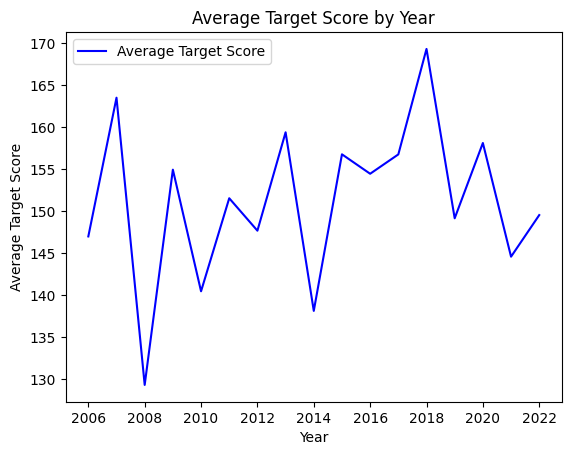

In [9]:
years = ['2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
year_targets = []
for year in years:
    targets = []
    year_df = t20_data[t20_data['Date'].str.slice(stop=4) == year]
    for j in range(len(year_df.index)-1):
        if year_df['Match ID'].iloc[j] != year_df['Match ID'].iloc[j+1]:
            targets.append(year_df['Target Score'].iloc[j])
    year_targets.append(sum(targets)/len(targets))
df = pd.DataFrame({'Average Target Score': year_targets}, index=years)

df.plot(kind='line', color='blue')
plt.title('Average Target Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Target Score')
plt.show()

***Analyzing Individual Batsman's performance***

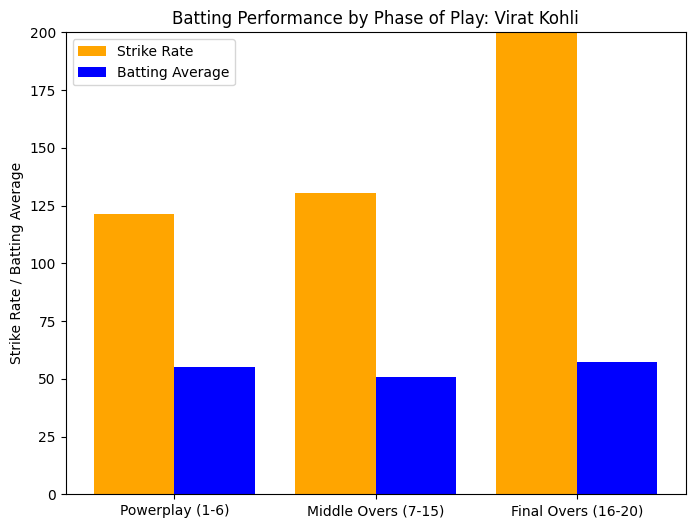

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

powerplay_df = t20_data.loc[(t20_data['Over'] >= 1) & (t20_data['Over'] <= 6)]
middle_df = t20_data.loc[(t20_data['Over'] >= 7) & (t20_data['Over'] <= 15)]
end_df = t20_data.loc[(t20_data['Over'] >= 16) & (t20_data['Over'] <= 20)]

player = 'V Kohli'
dfs =[powerplay_df, middle_df, end_df]
AVGs = []
SRs = []
BASRAs = []
for df in dfs:
    player_mask = (df['Batter'] == player)
    batter_df = df.loc[player_mask]
    n_outs = len(df[df['Player Out'] == player].index)
    total_runs = sum(batter_df['Batter Runs'])
    total_bf = len(batter_df[batter_df['Ball Rebowled'] == 0].index)
    bat_avg = total_runs/n_outs
    sr = (total_runs/total_bf)*100
    basra = bat_avg + sr
    AVGs.append(bat_avg)
    SRs.append(sr)
    BASRAs.append(basra)


stages = ['Powerplay (1-6)', 'Middle Overs (7-15)', 'Final Overs (16-20)']

fig, ax = plt.subplots(figsize=(8, 6))
x_labels = stages
x_positions = np.arange(len(x_labels))
ax.bar(x_positions, SRs, width=0.4, label='Strike Rate', color='orange')
ax.bar(x_positions+0.4, AVGs, width=0.4, label='Batting Average', color = 'blue')
ax.set_ylim([0, 200])
ax.set_ylabel('Strike Rate / Batting Average')
ax.set_title('Batting Performance by Phase of Play: Virat Kohli')
ax.legend()
ax.set_xticks(x_positions+0.2)
ax.set_xticklabels(x_labels)
plt.show()

C:\Users\vaish\AppData\Local\Temp\ipykernel_41856\4285262148.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  player_data.append([player, date, total_runs/n_outs, (total_runs/total_bf)*100])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


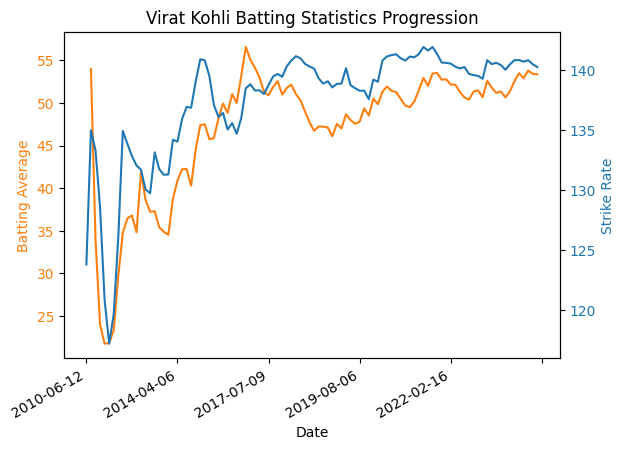

In [18]:
player = 'V Kohli'
player_df =t20_data[(t20_data['Batter' ]== player) | (t20_data['Non Striker'] == player)]
unique_dates = player_df['Date'].unique()
unique_dates_sorted = sorted(unique_dates)

player_data = []
n_outs = 0
total_runs = 0
total_bf = 0

for date in unique_dates_sorted:
    game_df = player_df[player_df['Date'] == date]
    batter_df = game_df[game_df['Batter'] == player]
    runs = batter_df['Batter Runs'].sum()
    if player in game_df['Player Out'].values:
        n_outs += 1
    bf = len(batter_df[batter_df['Ball Rebowled'] == 0].index)
    total_runs += runs
    total_bf += bf
    player_data.append([player, date, total_runs/n_outs, (total_runs/total_bf)*100])
    
player_data_df = pd.DataFrame(player_data, columns= ['Player', 'Date', 'Batting Average', 'Strike Rate'])

fig, ax1 = plt.subplots()
color = 'tab:orange'
ax1.set_xlabel('Date')
ax1.set_ylabel('Batting Average', color=color)
ax1.plot(player_data_df['Date'], player_data_df['Batting Average'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Strike Rate', color=color)
ax2.plot(player_data_df['Date'], player_data_df['Strike Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.legend()
fig.autofmt_xdate()
plt.title('Virat Kohli Batting Statistics Progression')
plt.show()

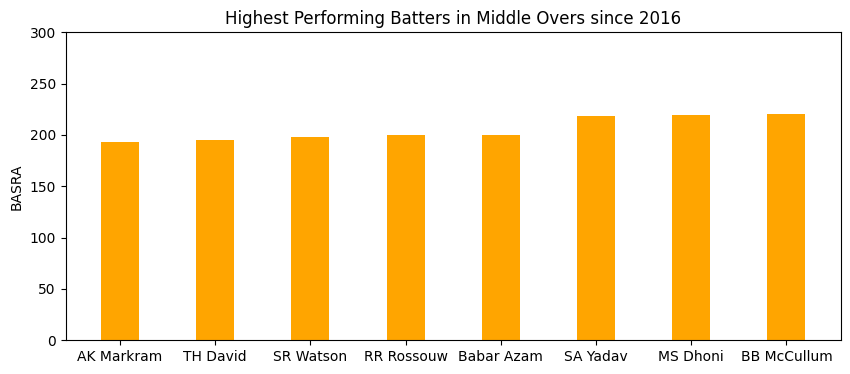

In [24]:
middle_df['Date'] = pd.to_datetime(middle_df['Date'])
middle_df = middle_df[middle_df['Date'].dt.year > 2010]

countries_list = ['Afghanistan', 'Australia', 'Bangladesh', 'England', 'India', 'Ireland', 'New Zealand', 'Pakistan', 'Sri Lanka', 'South Africa', 'West Indies', 'Zimbabwe']
filtered_batsmen = middle_df[((middle_df['Innings'] == 1) & (middle_df['Bat First'].isin(countries_list))) | ((middle_df['Innings'] == 2) & (middle_df['Bat Second'].isin(countries_list)))]
batter_list = filtered_batsmen['Batter'].unique().tolist()

BATTER = []
BASRA = []
BASRA2 = []
for batter in batter_list:
    batter_df = middle_df.loc[middle_df['Batter'] == batter]
    if len(batter_df.index) > 200:
        BATTER.append(batter)
        n_outs = len(middle_df[middle_df['Player Out'] == batter].index)   
        total_runs = sum(batter_df['Batter Runs'])
        total_bf = len(batter_df[batter_df['Ball Rebowled'] == 0].index)
        bat_avg = total_runs/n_outs
        sr = (total_runs/total_bf)*100
        BASRA.append(bat_avg + sr)
        BASRA2.append(2*bat_avg + sr)

BASRA = np.array(BASRA)
max_indices = np.argsort(BASRA)[-8:]
max_batters = [BATTER[i]for i in max_indices]
max_BASRAs = [BASRA[i] for i in max_indices]

fig, ax = plt.subplots(figsize=(10, 4))
x_labels = max_batters
x_positions = np.arange(len(x_labels))

ax.bar(x_positions, max_BASRAs, width=0.4, label='BASRA', color='orange')
ax.set_ylim([0, 300])
ax.set_ylabel('BASRA')
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)
ax.set_title('Highest Performing Batters in Middle Overs since 2016')
plt.show()